In [33]:
import sys
import os
import importlib
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import pandas as pd
from sklearn.preprocessing import normalize
sys.path.insert(0, os.path.join(os.getcwd(),"..","data"))
sys.path.insert(0, os.path.join(os.getcwd(),"..","src","data"))
sys.path.insert(0, os.path.join(os.getcwd(),"..","src","model"))
from DataLoader import DataLoader
from FileParser import FileParser

In [34]:
parser = FileParser()

In [35]:
keywords_train = DataLoader().papers(["2013","2014","2015"]).conferences().keywords().data
keywords_test = DataLoader().papers(["2016"]).conferences().keywords().data
keywords = pd.DataFrame(
    list(parser.getData("marketcodes#name").items()),
    columns=["keyword","keyword_label"]
)

Process 'chapters_books_2013' not in memory yet.
Process 'chapters_bookeditions_2013' not in memory yet.
Process 'chapters_2013#title' not in memory yet.
Process 'chapters_2013#language' not in memory yet.
Process 'chapters_books_2014' not in memory yet.
Process 'chapters_bookeditions_2014' not in memory yet.
Process 'chapters_2014#title' not in memory yet.
Process 'chapters_2014#language' not in memory yet.
Process 'chapters_books_2015' not in memory yet.
Process 'chapters_bookeditions_2015' not in memory yet.
Process 'chapters_2015#title' not in memory yet.
Process 'chapters_2015#language' not in memory yet.
Process 'books_conferences' not in memory yet.
Process 'conferences#acronym' not in memory yet.
Process 'conferences#city' not in memory yet.
Process 'conferences#country' not in memory yet.
Process 'conferences#dateend' not in memory yet.
Process 'conferences#datestart' not in memory yet.
Process 'conferences#name' not in memory yet.
Process 'conferences#year' not in memory yet.

# Training vs. Test set

In [36]:
print(len(keywords_train))
print(len(keywords_test))

num_train = len(keywords_train.keyword.unique())
num_test = len(keywords_test.keyword.unique())
intersect = len(set(keywords_train.keyword.unique()).intersection(set(keywords_test.keyword.unique())))

print("train: {}, test: {}, intersect: {} = {}".format(num_train,num_test,intersect,intersect/num_test))

346885
135980
train: 155, test: 150, intersect: 115 = 0.7666666666666667


In [74]:
num_train_lab = len(keywords_train.keyword_label.unique())
num_test_lab = len(keywords_test.keyword_label.unique())

print("train: {}, test: {}".format(num_train_lab,num_test_lab))

train: 154, test: 147


# Popular keywords

In [37]:
keywords_train.groupby(by=["keyword_label"])["bookedition"].count().sort_values(ascending=False)
# mostly Computer Science related: 57212/57797=99%

keyword_label
Computer Science                                               57212
Artificial Intelligence (incl. Robotics)                       25588
Information Systems Applications (incl.Internet)               24658
Algorithm Analysis and Problem Complexity                      17081
Information Storage and Retrieval                              16346
Data Mining and Knowledge Discovery                            12813
Computer Communication Networks                                12262
Pattern Recognition                                            11757
User Interfaces and Human Computer Interaction                 11315
Software Engineering                                           11302
Image Processing and Computer Vision                            8848
Computation by Abstract Devices                                 7837
Database Management                                             7484
Computers and Society                                           7000
Discrete Mathematics

## Keyword duplicate?

In [38]:
check_labels = keywords

In [39]:
print(
    len(check_labels.keyword.unique())
)

print(
    len(check_labels.keyword_label.unique())
)

1465
1451


In [40]:
df = check_labels.groupby(["keyword","keyword_label"]).size().reset_index()[["keyword","keyword_label"]]
df = df.groupby("keyword_label").size().sort_values(ascending=False)
#df[df.keyword_label=="Health Informatics"]
df[df>1]

keyword_label
"Renewable and Green Energy"                                    2
"Philosophy of History"                                         2
"Science, Humanities and Social Sciences, multidisciplinary"    2
"Quality of Life Research"                                      2
"Business Ethics"                                               2
"Dentistry"                                                     2
"Sociology of Education"                                        2
"Social Policy"                                                 2
"Complex Systems"                                               2
"Gender Studies"                                                2
"Health Informatics"                                            2
"Systems Biology"                                               2
"Pharmacy"                                                      2
"Rehabilitation"                                                2
dtype: int64

# Number of keywords per book

In [62]:
df = keywords_train.groupby(["bookedition","keyword"]).count().reset_index()
counts = df.groupby("bookedition").count().reset_index()[["bookedition","keyword"]]

In [66]:
print(counts.median())
print(counts.mean())

keyword    6.0
dtype: float64
keyword    5.839657
dtype: float64


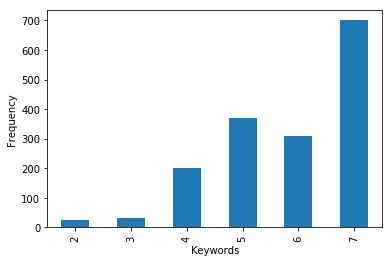

In [72]:
counts.groupby("keyword").count().plot(kind="bar")
plt.xlabel("Keywords")
plt.ylabel("Frequency")
plt.legend().remove()
plt.show()